# Sourcepredict analyis example

In [1]:
import pandas as pd

In this example, we'll apply Sourcepredict to the example data.   

The [example source files](https://github.com/maxibor/sourcepredict/blob/master/data/modern_gut_microbiomes_sources.csv) contains the following sources:
- *Homo sapiens* gut microbiome ([1](https://doi.org/10.1038/nature11234), [2](https://doi.org/10.1093/gigascience/giz004), [3](https://doi.org/10.1038/s41564-019-0409-6), [4](https://doi.org/10.1016/j.cell.2019.01.001), [5](https://doi.org/10.1038/ncomms7505), [6](http://doi.org/10.1016/j.cub.2015.04.055))
- *Canis familiaris* gut microbiome ([1](https://doi.org/10.1186/s40168-018-0450-3))
- Soil microbiome ([1](https://doi.org/10.1073/pnas.1215210110), [2](https://www.ncbi.nlm.nih.gov/bioproject/?term=322597), [3](https://dx.doi.org/10.1128%2FAEM.01646-17))

In [4]:
src = pd.read_csv("../data/modern_gut_microbiomes_sources.csv", index_col=0)
labels = pd.read_csv("../data/modern_gut_microbiomes_labels.csv", index_col=0)

A source file is a OTU count table containing the samples as columns headers, and the TAXID as row indices

In [5]:
src.head()

,SRR1175007,SRR042182,SRR061154,SRR061499,SRR063469,SRR062324,SRR1179037,SRR061236,SRR061456,SRR642021,...,mgm4477903_3,mgm4477807_3,mgm4477874_3,mgm4477904_3,mgm4477804_3,mgm4477873_3,ERR1939166,SRR3578625,ERR1939165,SRR3578645
TAXID,,,,,,,,,,,,,,,,,,,,,
0,3528337.0,11563613.0,10084261.0,20054993.0,8747525.0,12116517.0,4191329.0,13992760.0,14825759.0,11083673.0,...,6169203.0,8820851.0,5713837.0,10238500.0,5055930.0,10380594.0,13391896.0,1553.0,14802198.0,736.0
6,0.0,78.0,0.0,127.0,0.0,79.0,0.0,0.0,0.0,172.0,...,68.0,247.0,211.0,156.0,147.0,383.0,1353.0,0.0,1522.0,0.0
7,0.0,78.0,0.0,127.0,0.0,79.0,0.0,0.0,0.0,172.0,...,68.0,247.0,211.0,156.0,147.0,383.0,1353.0,0.0,1522.0,0.0
9,0.0,129.0,0.0,153.0,0.0,151.0,0.0,165.0,96.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0,65.0,0.0
10,0.0,160.0,0.0,193.0,0.0,99.0,0.0,55.0,249.0,238.0,...,0.0,0.0,0.0,0.0,0.0,0.0,263.0,0.0,466.0,0.0


The labels file contains the mapping of samples names with their actual sources

In [8]:
labels.head()

,labels
SRR1175007,Homo_sapiens
SRR042182,Homo_sapiens
SRR061154,Homo_sapiens
SRR061499,Homo_sapiens
SRR063469,Homo_sapiens


Here, we'll use a sink file coming for a [dog gut microbiome study](https://microbiomejournal.biomedcentral.com/articles/10.1186/s40168-018-0450-3).  
A sink file is formatted exactly like a source file, with samples as columns headers, and the TAXID as row indices.

In [11]:
sink = pd.read_csv("../data/test/dog_test_sample.csv", index_col=0)
sink.head()

,ERR1915662
TAXID,
0,1933576
838,61161
839,10783
28132,6691
28131,5961


We'll now launch sourcepredict with the GMPR normalization method, and the t-SNE embedding, on 6 cores.

In [17]:
!sourcepredict -s ../data/modern_gut_microbiomes_sources.csv \
               -l ../data/modern_gut_microbiomes_labels.csv \
               -n GMPR \
               -m TSNE \
               -e example_embedding.csv \
               -t 6 ../data/test/dog_test_sample.csv

Step 1: Checking for unknown proportion
  == Sample: ERR1915662 ==
	Adding unknown
	Normalizing (GMPR)
	Computing Bray-Curtis distance
	Performing MDS embedding in 2 dimensions
	KNN machine learning
	Training KNN classifier on 6 cores...
	-> Testing Accuracy: 1.0
	----------------------
	- Sample: ERR1915662
		 known:98.61%
		 unknown:1.39%
Step 2: Checking for source proportion
	Computing weighted_unifrac distance on species rank
	TSNE embedding in 2 dimensions
	KNN machine learning
	Performing 5 fold cross validation on 6 cores...
	Trained KNN classifier with 10 neighbors
	-> Testing Accuracy: 0.99
	----------------------
	- Sample: ERR1915662
		 Canis_familiaris:96.1%
		 Homo_sapiens:2.47%
		 Soil:1.43%
Sourcepredict result written to dog_test_sample.sourcepredict.csv
Embedding coordinates written to example_embedding.csv


Two files were generated by Sourcepredict:
- `dog_test_sample.sourcepredict.csv` which contains the proportions of each source  
We can see that as expected for a dog gut microbiome sample, it is mostly predicted as coming from a dog source (*Canis familiaris*)

In [19]:
pd.read_csv("dog_test_sample.sourcepredict.csv", index_col=0)

,ERR1915662
Canis_familiaris,0.947610
Homo_sapiens,0.024396
Soil,0.014106
unknown,0.013889


- `example_embedding.csv` which contains the embedding coordinates of all samples (sources and sinks)

In [20]:
embed = pd.read_csv("example_embedding.csv", index_col=0)
embed.head()

,PC1,PC2,labels,name
SRR1175007,-25.936980,7.392624,Homo_sapiens,SRR1175007
SRR042182,-19.180529,6.396648,Homo_sapiens,SRR042182
SRR061154,-26.551731,10.277035,Homo_sapiens,SRR061154
SRR061499,-22.634090,6.809382,Homo_sapiens,SRR061499
SRR063469,-20.179138,5.025330,Homo_sapiens,SRR063469


We can plot this embedding, using for example, [plotnine](https://plotnine.readthedocs.io/en/stable/), which implements the grammar of graphics in Python

In [25]:
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

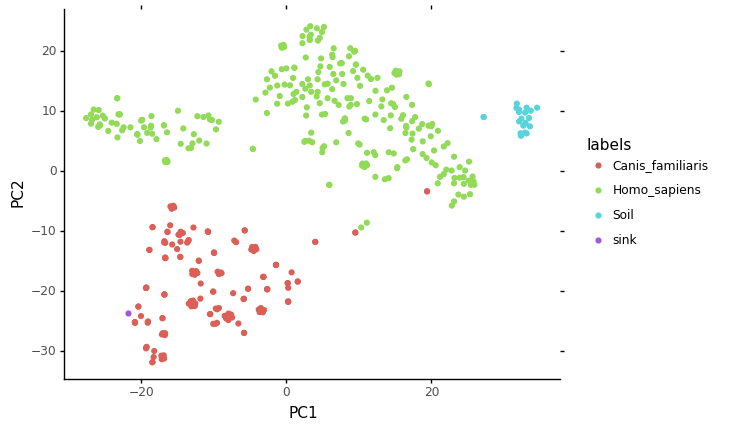

<ggplot: (-9223372036553722059)>

In [26]:
ggplot(data = embed, mapping = aes(x="PC1",y="PC2", color="labels")) + geom_point() + theme_classic()

We can see that our Dog sink sample is well embedded with the other reference dog samples